# <center><strong>Telecommunications Customer Churn</strong></center>

---------------------------

#### **By Mohamed Jamyl**

http://linkedin.com/in/mohamed-jamyl

https://www.kaggle.com/mohamedjamyl

https://github.com/Mohamed-Jamyl

---------------------------

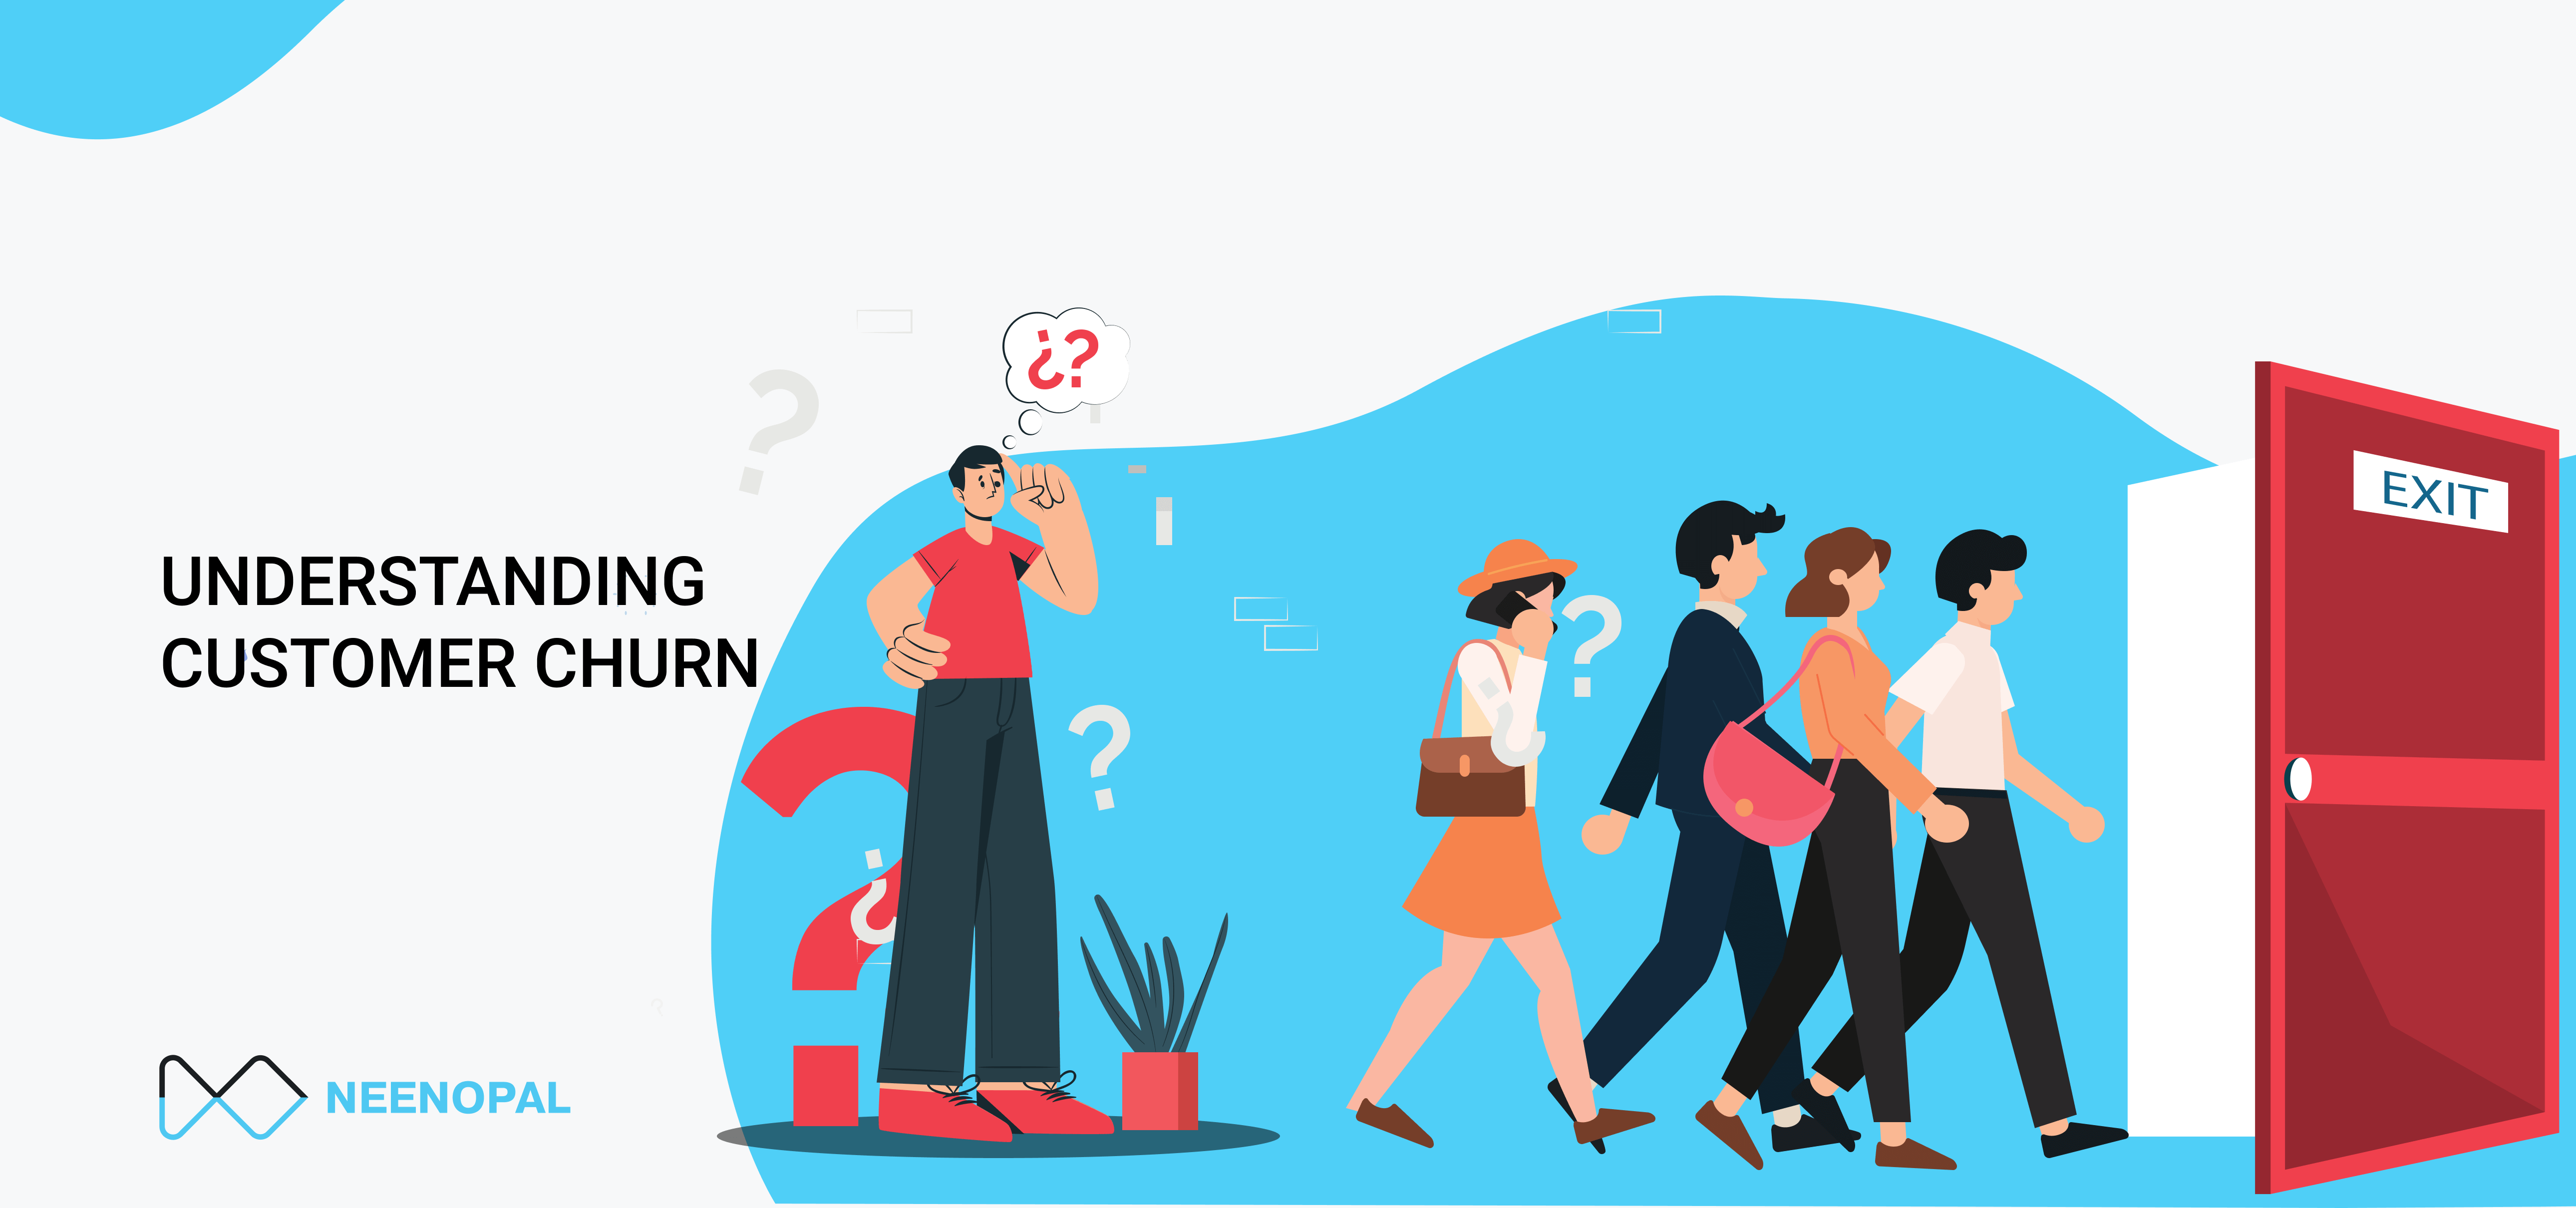

In [177]:
from IPython.display import Image
Image(filename='1.png')

--------------------------


## <center><strong>Project Overview</strong></center>
### **The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.**

---------------------------
--------------------------
---------------------------

## **Import Libraries**

------------------------

In [178]:
from pandas import read_csv, concat
from numpy import array, tril_indices_from
from matplotlib.pyplot import show, tight_layout, subplots
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout,xticks
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from pickle import dump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


import warnings
warnings.filterwarnings('ignore')

----------------------------
---------------------------
--------------------------

## **Exploratory Data Analysis (EDA)**
### **Initial Data Understanding**
 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [179]:
df = read_csv('Telco_Customer_Churn.csv')

In [180]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5877,6777-TGHTM,Female,0,No,No,53,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),106.95,5785.5,Yes
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
1129,3452-ABWRL,Male,1,No,No,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.6,No
2015,5155-AZQPB,Female,0,Yes,Yes,28,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.90,1410.25,No
2443,9802-CAQUT,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.55,7887.25,No
3145,2919-HBCJO,Female,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),76.65,333.6,Yes
2317,6770-UAYGJ,Female,0,Yes,Yes,49,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1211.65,No
2303,7377-DMMRI,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,47.80,92.45,Yes
5704,0168-XZKBB,Female,0,Yes,No,19,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,1564.4,No
222,6469-MRVET,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.20,20.2,No


In [182]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [183]:
df.shape

(7043, 21)

In [184]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [186]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [187]:
df.duplicated().sum()

0

In [188]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

-------------------------
---------------------------
-------------------------

### **Basic Statistical Overview**

-------------------------

- Summary Statistical : **describe()**

------------------

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [190]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


----------------------

- Summary Statistical : **value_counts()**

----------------------

In [191]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

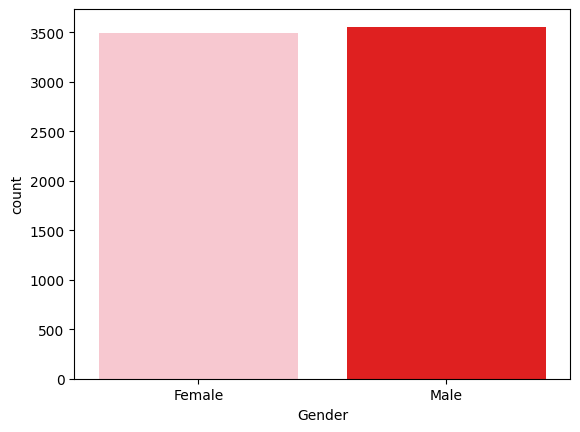

In [192]:
countplot(x = 'gender', data = df, palette=['pink','red'])
xlabel('Gender')
show()

---------------------

In [193]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

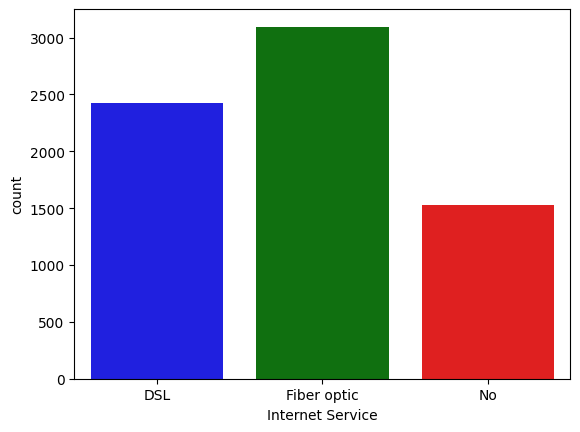

In [194]:
countplot(x = 'InternetService', data=df, palette=['blue','green','red'])
xlabel('Internet Service')
show()

--------------------------

In [195]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

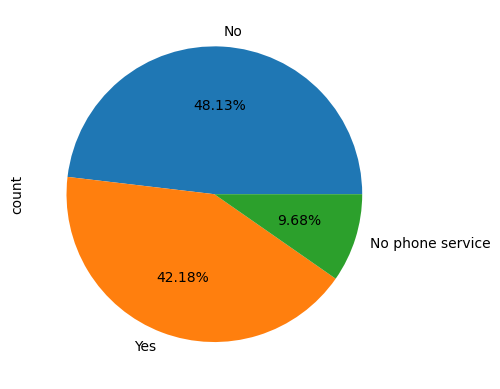

In [196]:
df['MultipleLines'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

In [197]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

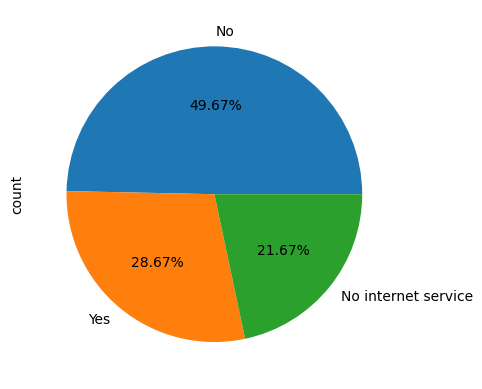

In [198]:
df['OnlineSecurity'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------

In [199]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

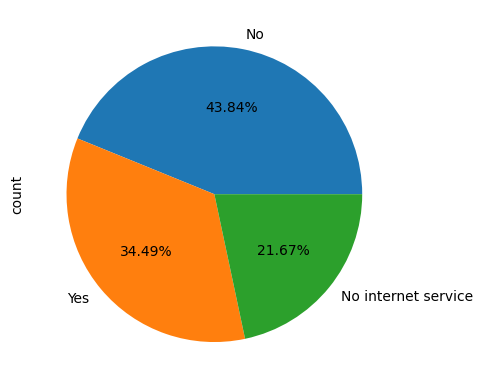

In [200]:
df['OnlineBackup'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

In [201]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

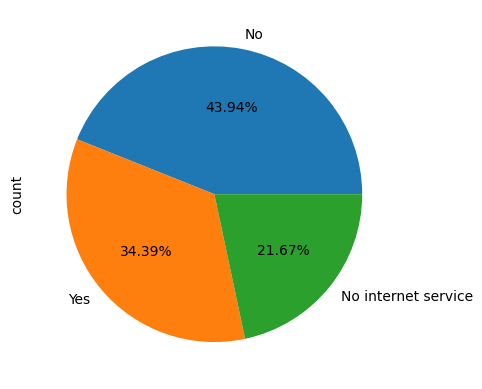

In [202]:
df['DeviceProtection'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------------------
--------------------------------------
--------------------------------------

## **Data Cleaning**

---------------------------------

In [203]:
df=df.drop(['customerID'],axis=1)

In [204]:
# Checking for spaces
spaces = [i for i in df['TotalCharges'].values if i == ' ']
len(spaces)

11

In [205]:
df.loc[(df['TotalCharges']==' '),(['TotalCharges'])]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [206]:
from numpy import nan
# replace ' ' with nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', nan)

In [207]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [208]:
# transform total 'TotalCharges' column from object to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [209]:
# replace nan with mean
m = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].replace(nan, m)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [210]:
df['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

-----------------------------
------------------------------

## **Distribution of Variables**
---------------------------------
- **Numerical Features (KDE)**
-------------------------------

#### **The Distribution of tenure**

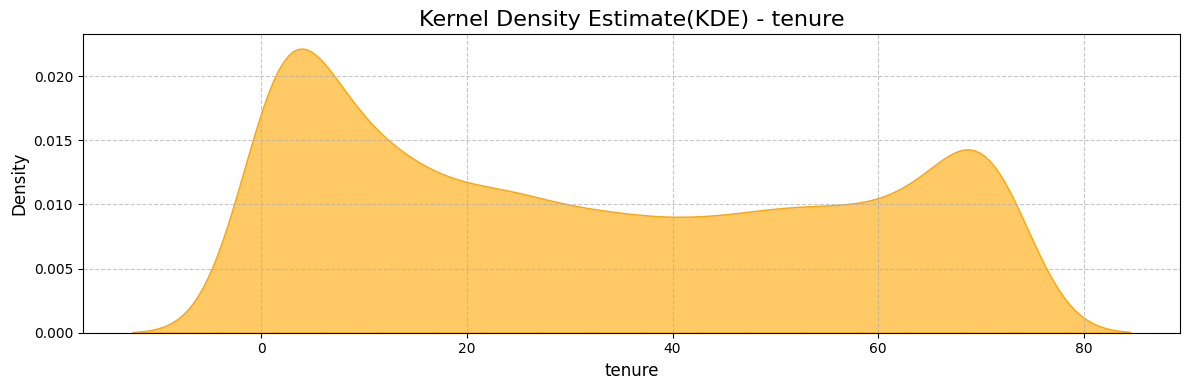

In [211]:
figure(figsize=(12,4))
kdeplot(df['tenure'],fill = True, color='orange',alpha = 0.6 )
title(f'Kernel Density Estimate(KDE) - tenure', fontsize = 16)
xlabel('tenure',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle = '--',alpha = 0.7)
tight_layout()
show()

### The plot shows a **bimodal distribution**, meaning it has two distinct peaks (or modes).

- ##### **First Peak (around 5-10):** There's a prominent peak in the density around the "tenure" value of approximately 5 to 10. This suggests that a large proportion of individuals or entities in this dataset have a relatively short tenure.
- ##### **Second Peak (around 65-70):** There's another, smaller but still significant, peak in the density around the "tenure" value of approximately 65 to 70. This indicates a second group of individuals or entities with a much longer tenure.
- ##### **Valley in Between:** A noticeable "valley" exists between the two peaks (roughly from 20 to 60), indicating that fewer individuals or entities have tenures in this mid-range compared to the two extreme ends.
- ##### **Overall Shape:** The distribution is not symmetrical; it's a combination of two distinct clusters.

--------------------------

#### **The Distribution of Monthly Charges**

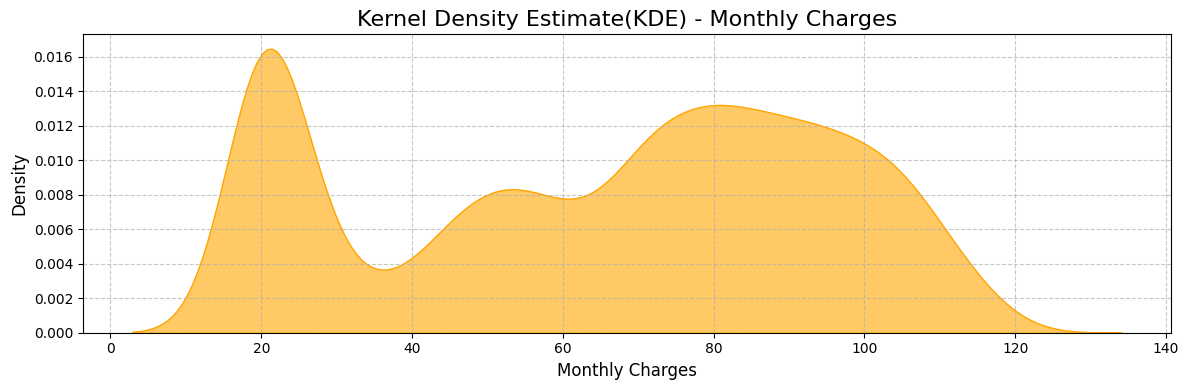

In [212]:
figure(figsize=(12,	4))
kdeplot(df['MonthlyCharges'], fill=True,	color='orange', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Monthly Charges',	fontsize=16)
xlabel('Monthly Charges',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

### The plot shows a **multi-modal distribution**, appearing to have at least two, possibly three, distinct peaks.

- ##### **First Major Peak (around 20-25):** There's a very prominent peak indicating a high density of data points with "Monthly Charges" in the range of approximately 20 to 25. This suggests a large segment of customers with relatively low monthly charges.
- ##### **Second Major Peak (around 80-90):** Another significant peak is observed around 80 to 90 on the "Monthly Charges" axis. This indicates a second large group of customers with high monthly charges.
- ##### **Smaller Peak/Bump (around 50-60):** There's a smaller, less pronounced bump or minor peak in the density around the 50-60 mark. This could represent a third, smaller segment of customers with medium-range monthly charges.
- ##### **Valleys in Between:** Distinct valleys separate these peaks, showing lower densities of customers with monthly charges in those intermediate ranges.
- ##### **Overall Shape:** The distribution is clearly not symmetrical or normal. It reflects multiple distinct clusters of "Monthly Charges" values.


--------------------------

#### **The Distribution of Total Charges**

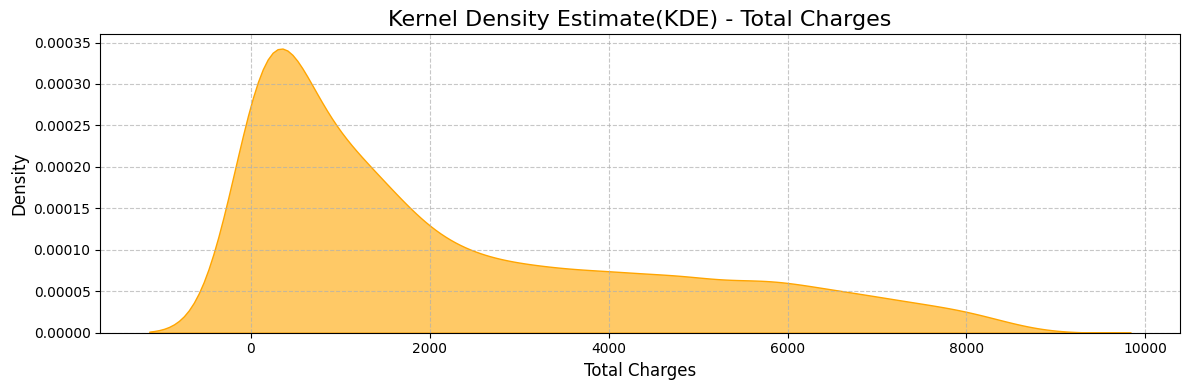

In [213]:
figure(figsize=(12,	4))
kdeplot(df['TotalCharges'], fill=True,	color='orange', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Total Charges',	fontsize=16)
xlabel('Total Charges',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

### The plot shows a **unimodal distribution** that is heavily skewed to the right (positively skewed).

- ##### **Main Peak (around 0-1000):** There's a very prominent peak in the density occurring at the lower end of "Total Charges," specifically somewhere close to 0 but extending significantly up to around 1000. This indicates that a large majority of the data points have relatively low total charges.
- ##### **Long Tail to the Right:** After the peak, the density gradually decreases and extends with a long tail towards higher "Total Charges" values (up to 10000). This "long tail" is characteristic of a right-skewed distribution, meaning there are fewer, but significantly higher, "Total Charges" values.
- ##### **No Second Peak:** Unlike the previous "tenure" plot, there are no distinct second peaks; the distribution is clearly unimodal.

----------------------------------
-------------------------------

## **Correlation**

----------------------------

<Axes: >

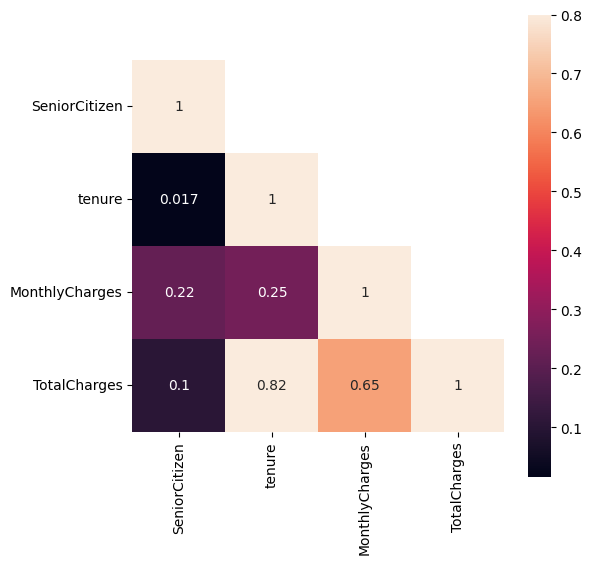

In [214]:
corrMatt = df.select_dtypes('number').corr()
mask = array(corrMatt)
mask[tril_indices_from(mask)] = False
fig,ax= subplots()
fig.set_size_inches(6,6)
heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

- ##### **tenure** and **TotalCharges** are very strongly positively correlated (0.82). This is the strongest relationship, as total charges are directly dependent on tenure.
- ##### **MonthlyCharges** and **TotalCharges** are strongly positively correlated (0.65).
- ##### Other relationships (**SeniorCitizen** with any of the charge/tenure variables, and **tenure** with **MonthlyCharges**) are generally weak or very weak.

--------------------------
----------------------------
--------------------------

## **Detect Outliers**
---------------------------

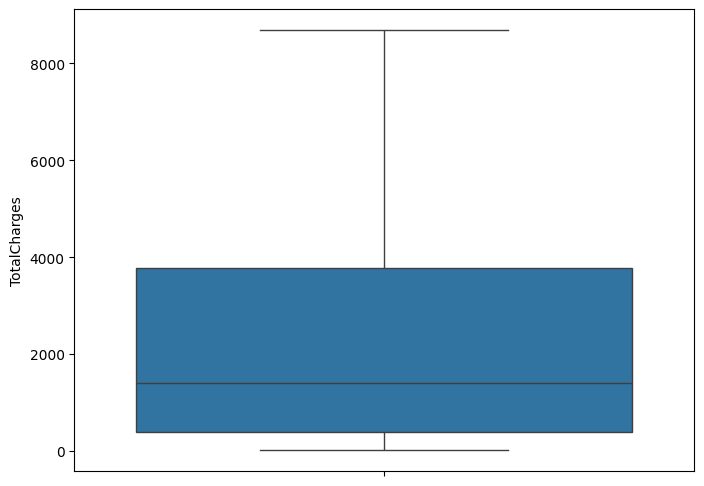

In [215]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = df, y = 'TotalCharges', orient="v", ax=axes)
show()

- #### **Median:** The horizontal line inside the box appears to be around 1400-1500. This means that 50% of the customers have TotalCharges less than or equal to this value.
- #### **Interquartile Range (IQR - the box itself):** The box spans from approximately Q1 ≈ 400-500 to Q3 ≈ 3800-3900. This indicates that the middle 50% of "TotalCharges" values fall within this wide range. The large box size suggests a considerable spread in the central portion of the data.
- #### **Skewness:** The box is not centered within the whiskers, and the median line is closer to the bottom of the box, while the top whisker is much longer than the bottom part of the distribution below Q1. This, combined with the earlier KDE plot for "TotalCharges," indicates that the data is positively (right) skewed. This means there's a long tail of higher "TotalCharges" values.
- #### **Whiskers:**
- ##### The bottom whisker extends down close to 0.
- ##### The top whisker extends up to around 8800-9000, encompassing a very wide range of charges. The absence of explicitly marked outliers above the top whisker suggests that values up to this maximum are considered within the expected range, even if they are high.


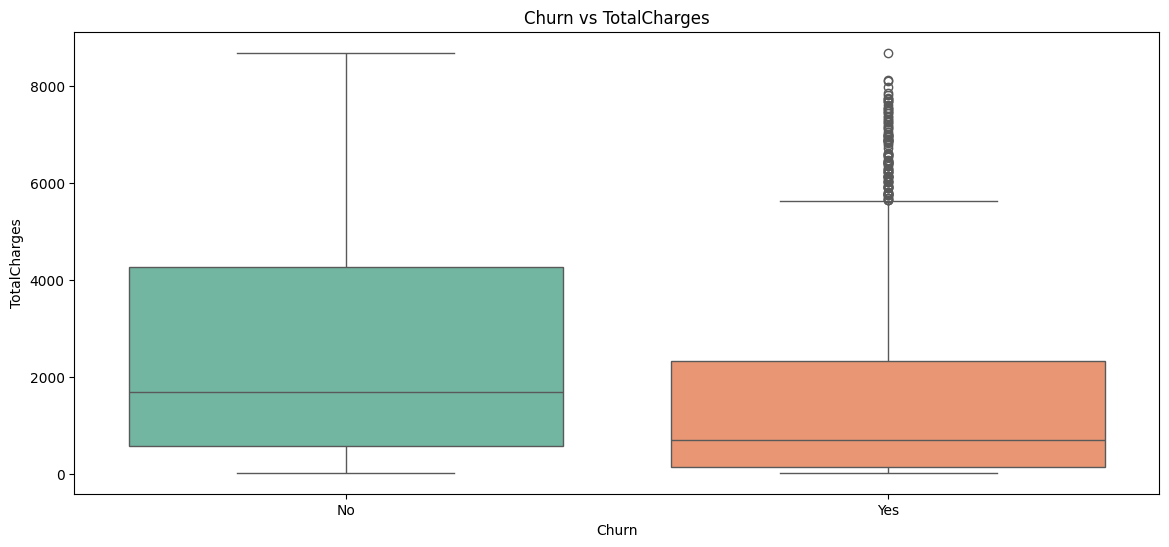

In [216]:
figure(figsize=(14, 6))
boxplot(x=df['Churn'], y=df['TotalCharges'], palette="Set2")
title(f'Churn vs TotalCharges')
show()

### The most striking observation is the clear difference in the median and overall distribution of **Total Charges** between **churned** and **non-churned** customers.

- ##### **Customers who do not churn tend to have significantly higher total charges on average and a wider spread of high charges**. Their median is much higher, and their box extends to much larger values. This suggests that long-term, high-value customers are less likely to churn.
- ##### **Customers who do churn tend to have much lower total charges on average**. Their median is substantially lower, and the bulk of their charges (the box) is concentrated at the lower end. This could imply that customers with shorter tenure or lower overall spending are more prone to churning.
- ##### **Outliers in "Churn = Yes":** The presence of high-value outliers in the churned group is interesting. While most churners have low total charges, a small segment of high-spending customers also churned. This might warrant further investigation to understand why these high-value customers departed.

------------------------------------
----------------------------------
---------------------------------

## **Analysis**

------------------------------

- ##### **Analyze Total Charges Distribution**

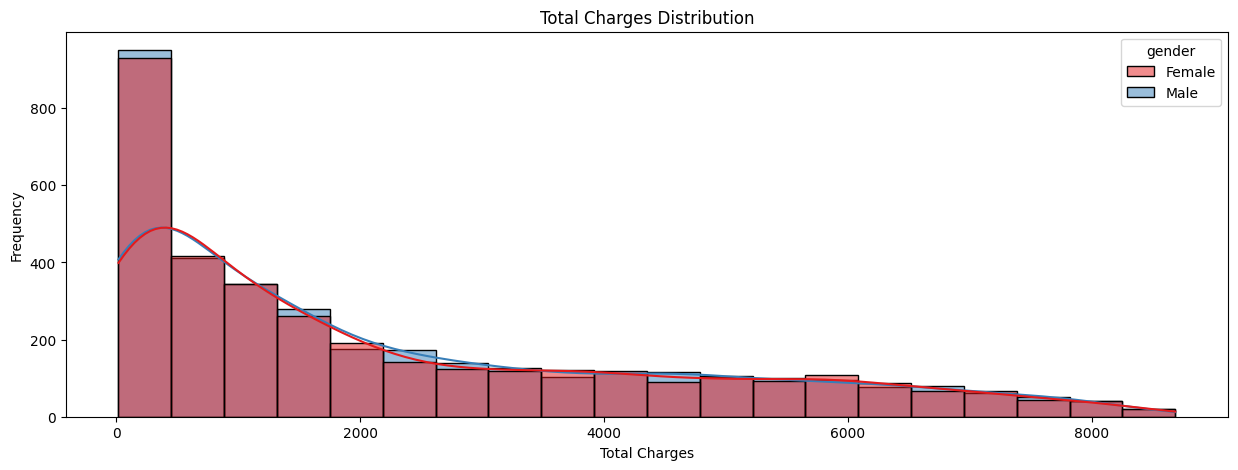

In [217]:
figure(figsize=(15, 5))
histplot(data=df,	x='TotalCharges', hue='gender', kde=True, bins=20, palette='Set1')
title('Total Charges Distribution')
xlabel('Total Charges')
ylabel('Frequency')
show()

- ##### **Overall Skewness:** Both female and male "Total Charges" distributions are highly positively (right) skewed. This means that a large number of customers (both male and female) have relatively low total charges, while a smaller number of customers have very high total charges.

- ##### **Peak at Lower Charges:** There is a very strong peak in frequency at the lowest "Total Charges" bins (close to 0). This suggests that a significant portion of customers, regardless of gender, have accumulated very low total charges. This could indicate new customers, customers with basic services, or those who churned early.

- ##### **Long Tail:** The frequencies gradually decrease as "Total Charges" increase, forming a long tail extending towards higher values. This is characteristic of skewed data, where extreme high values are less common.
----------------------------------------------

- ##### **Investigate relationships between churn and gender types**

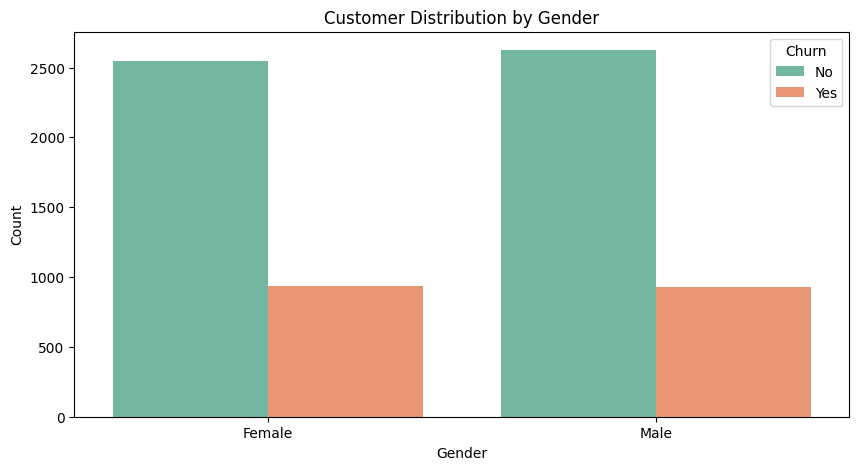

In [218]:
figure(figsize=(10, 5))
countplot(data=df, x='gender', hue='Churn', palette='Set2')
title('Customer Distribution by Gender')
xlabel('Gender')
ylabel('Count')
show()

### **Analysis of the Distribution:**

- #### **Total Customers per Gender:**

- ##### For Female customers: Approximately 2500 did not churn, and around 950-1000 did churn.
- ##### For Male customers: Approximately 2600 did not churn, and around 950-1000 did churn.
- ##### The total number of male and female customers appears roughly equal, suggesting a balanced dataset in terms of gender distribution.

- #### **Churn Rate within Each Gender:**

- ##### For both Female and Male, the "No" churn bar is significantly taller than the "Yes" churn bar. This indicates that for both genders, a majority of customers did not churn.
- ##### The absolute number of churned customers (orange bars) is very similar for both Female and Male (around 950-1000).

- #### **Gender Comparison in Churn:**

- ##### Crucially, this plot shows **no significant difference in churn behavior between genders**. Both male and female customers exhibit very similar patterns of churn. The proportion of churned customers relative to non-churned customers looks almost identical for both genders.

----------------------------------

- ##### **Analyze Tenure Distribution**

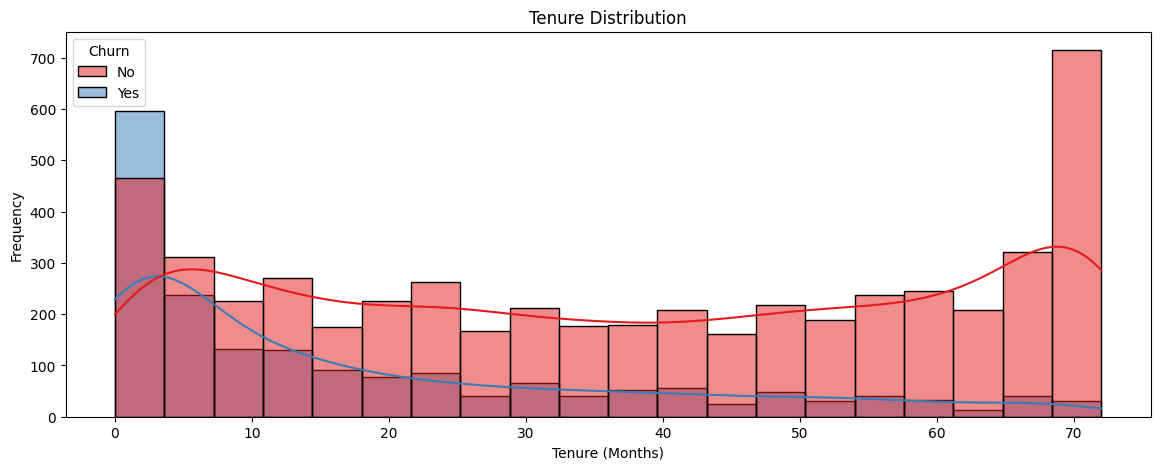

In [219]:
figure(figsize=(14, 5))
histplot(data=df, x='tenure', hue='Churn', kde=True, bins=20, palette='Set1')
title('Tenure Distribution')
xlabel('Tenure (Months)')
ylabel('Frequency')
show() 

### **Analysis of the Distribution and Churn Behavior:**

- #### **Overall Tenure Distribution (Combined):** The combined distribution (height of the full stacked bars) shows a bimodal pattern, similar to a previously analyzed KDE plot for "tenure." There's a large peak at very low tenures (near 0-5 months) and another significant peak at very high tenures (around 70 months). This indicates two main groups of customers: short-term and long-term.

- #### **Churn = Yes (Blue):**

- ##### **High Frequency at Low Tenure**: The most striking feature is the very tall blue bar at the 0-5 months tenure range. This indicates that a disproportionately high number of customers churn very early in their tenure. The blue KDE line also peaks sharply at the lowest tenure values and then declines rapidly.
- ##### **Decreasing Churn with Increasing Tenure:** As tenure increases, the frequency of churned customers (blue bars and line) generally decreases significantly. There are very few churned customers at tenures beyond 20-30 months, and the blue line becomes very low.

- #### **Churn = No (Red/Pink):**

- ##### **Dominant at Higher Tenures**: Customers who did not churn (red/pink bars) become the dominant group as tenure increases.
- ##### **Bimodal for Non-Churners**: The red/pink KDE line (non-churners) shows a bimodal distribution itself, with a peak at low tenure (but smaller than the churners' peak) and a very strong peak at high tenure (around 70 months). This suggests that loyal customers tend to either stay for a very short initial period or become very long-term.
- ##### **Growth at High Tenure:** The frequency of non-churning customers is very high at the highest tenure values (around 70 months), indicating a large group of very loyal, long-term customers.

-----------------------------------

- ##### **Investigate relationships between churn and different contract types**

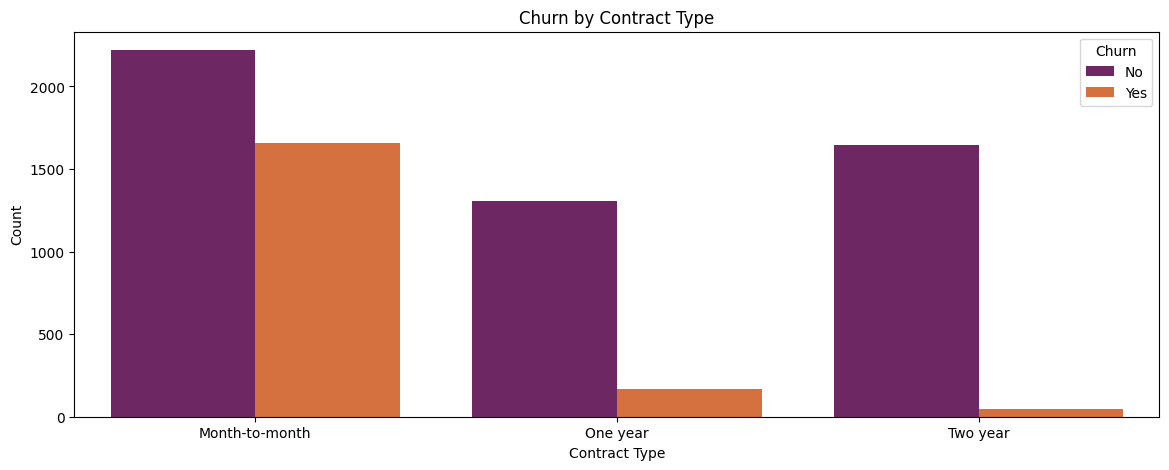

In [220]:
figure(figsize=(14, 5))
countplot(data=df, x='Contract', hue='Churn', palette='inferno')
title('Churn by Contract Type')
xlabel('Contract Type')
ylabel('Count')
show()

### **Analysis of the Distribution:**

- #### **Month-to-month Contract Type:**

- ##### **High churn:** This contract type has the highest number of churned customers (orange bar), appearing to be over 1500.
- ##### **High non-churn:** It also has a significant number of non-churned customers (purple bar), over 2000.
- ##### **Highest absolute churn:** Among all contract types, "Month-to-month" has the largest absolute number of churners.

- #### **One year Contract Type:**

- ##### **Significantly lower churn:** The number of churned customers (orange bar) for "One year" contracts is drastically lower than for "Month-to-month" contracts, appearing to be around 150-200.
- ##### **Moderate non-churn:** The number of non-churned customers (purple bar) is around 1300.

- #### **Two year Contract Type:**

- ##### **Extremely low churn:** The number of churned customers (orange bar) for "Two year" contracts is very low, appearing to be less than 50.
- ##### **High non-churn:** The number of non-churned customers (purple bar) is high, around 1600.

### **Comparison and Interpretation:**

#### This plot reveals a very strong relationship between contract type and customer churn.

- ##### Month-to-month contracts are highly associated with churn. Customers on these flexible plans are significantly more likely to churn compared to those on longer-term contracts.
- ##### Longer-term contracts (One year and Two year) have substantially lower churn rates. The longer the contract duration, the less likely a customer is to churn. This is particularly evident with "Two year" contracts, which show almost negligible churn.

----------------------------

- ##### **Investigate relationships between gender and different contract types**

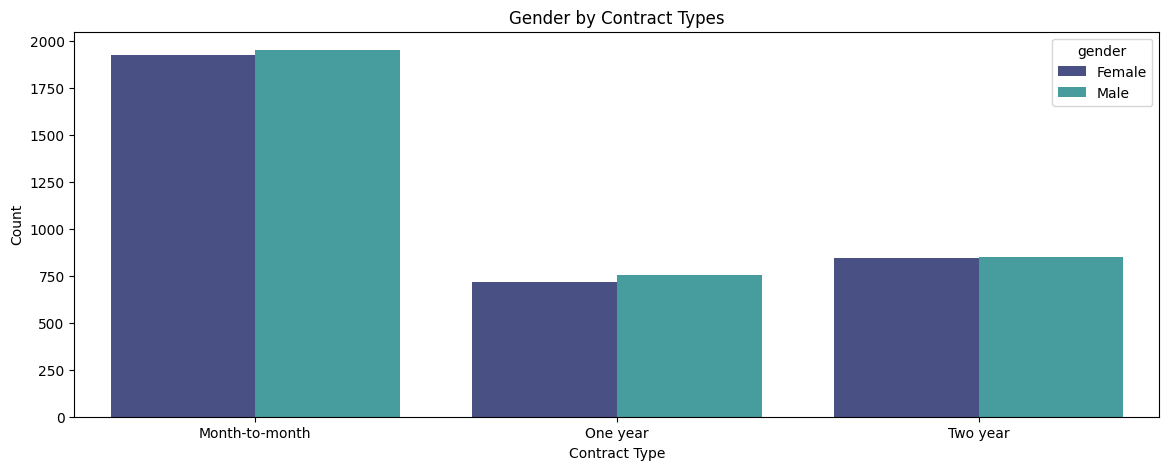

In [221]:
figure(figsize=(14, 5))
countplot(data=df, x='Contract', hue='gender', palette='mako')
title('Gender by Contract Types')
xlabel('Contract Type')
ylabel('Count')
show()

### **Analysis of the Distribution:**

- #### **Month-to-month Contract Type:**

- ##### There is a large number of customers on month-to-month contracts.
- ##### The counts for Female (around 1900) and Male (around 1950) customers are very close, indicating a roughly equal distribution of genders within this contract type.

- #### **One year Contract Type:**

- ##### The total number of customers on one-year contracts is significantly lower than month-to-month.
- ##### Again, the counts for Female (around 740) and Male (around 770) customers are very similar, suggesting a balanced gender distribution for this contract type as well.

- #### **Two year Contract Type:**

- ##### The total number of customers on two-year contracts is comparable to one-year contracts.
- ##### The counts for Female (around 850) and Male (around 870) customers are also very close, indicating a balanced gender distribution here.

#### **Comparison and Interpretation:**

- ##### The key takeaway from this plot is that gender distribution is very consistent across all contract types. For each contract duration, the number of male and female customers is approximately equal.
---------------------------

- ##### **Investigate relationships between churn and payment methods**

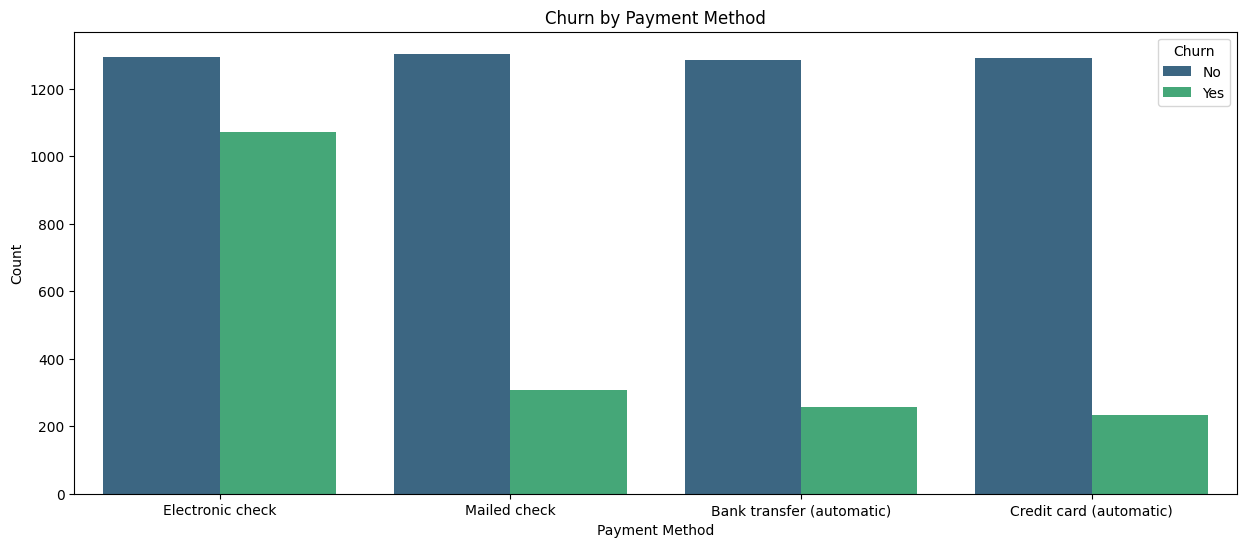

In [222]:
figure(figsize=(15, 6))
countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
title('Churn by Payment Method')
xlabel('Payment Method')
# xticks(rotation=45)
ylabel('Count')
show()

### **Analysis of the Distribution:**

- #### **Electronic Check:**

- ##### This payment method shows the highest absolute number of churned customers (green bar), appearing to be just above 1000.
- ##### The number of non-churned customers (dark blue bar) is slightly higher, around 1250-1300.
- ##### The churn rate (proportion of "Yes" to total) for electronic checks appears relatively high compared to other methods.

- #### **Mailed Check:**

- ##### The number of non-churned customers is high, similar to electronic checks (around 1250-1300).
- ##### However, the number of churned customers (green bar) is significantly lower than electronic checks, appearing to be around 300-350.

- #### **Bank Transfer (automatic)**:

- ##### The number of non-churned customers is also high (around 1250-1300), very similar to mailed checks and electronic checks.
- ##### The number of churned customers (green bar) is even lower than mailed checks, approximately 250.

- #### **Credit Card (automatic):**

- ##### Similar to bank transfers, non-churned customers are numerous (around 1250-1300).
- ##### The number of churned customers (green bar) is also low, comparable to bank transfers, around 200-250.

### **Comparison and Interpretation:**

##### This plot reveals a strong association between payment method and customer churn.

- ##### Electronic checks are clearly the riskiest payment method in terms of churn. Customers using electronic checks are much more likely to churn compared to those using other methods.
- ##### Automatic payment methods (Bank transfer and Credit card) have the lowest churn rates. Customers who set up automatic payments are significantly more stable and less likely to churn.
- ##### Mailed checks fall in between, having a higher churn rate than automatic methods but much lower than electronic checks.
-----------------------------

#### **Customer Segmentation**
- ##### **Segment customers based on monthly charges**

In [223]:
# Less than $50, $50-100, more than $100
from pandas import cut
from numpy import inf

bins_charges = [0, 50, 100, inf] 
labels_charges = ['Low', 'Medium', 'High']
df['Monthly_Charges_Group'] = cut(df['MonthlyCharges'], bins=bins_charges, labels=labels_charges)

In [224]:
df['Monthly_Charges_Group'].value_counts()

Monthly_Charges_Group
Medium    3842
Low       2299
High       902
Name: count, dtype: int64

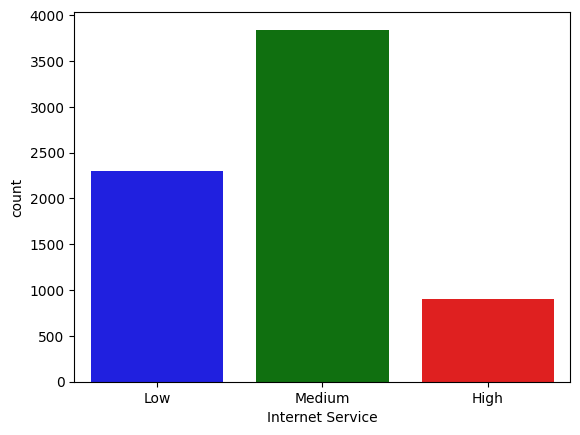

In [225]:
countplot(x = 'Monthly_Charges_Group', data=df, palette=['blue','green','red'])
xlabel('Internet Service')
show()

---------------------------------------------

- ##### **Segment customers based on (Tenure)**

In [226]:
# Less than 12 months, 12-24 months, more than 24 months

bins_tenure = [0, 12, 24, inf]   
labels_tenure = ['Short-term', 'Mid-term', 'Long-term']
df['Tenure_Group'] = cut(df['tenure'], bins=bins_tenure, labels=labels_tenure)

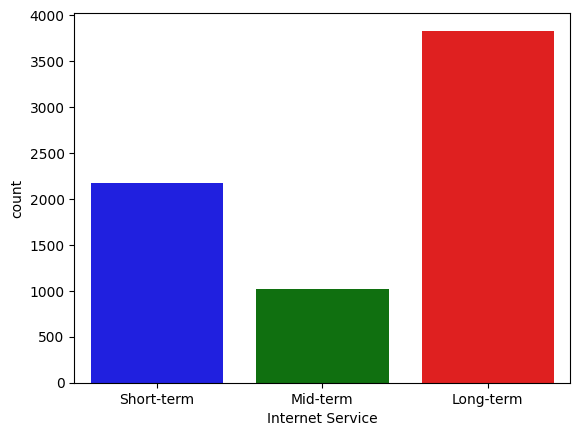

In [227]:
countplot(x = 'Tenure_Group', data=df, palette=['blue','green','red'])
xlabel('Internet Service')
show()

----------------------------------

- ##### **Customer abandonment rate based on length of stay**

Churn                No        Yes
Tenure_Group                      
Short-term    52.321839  47.678161
Mid-term      71.289062  28.710938
Long-term     85.963997  14.036003


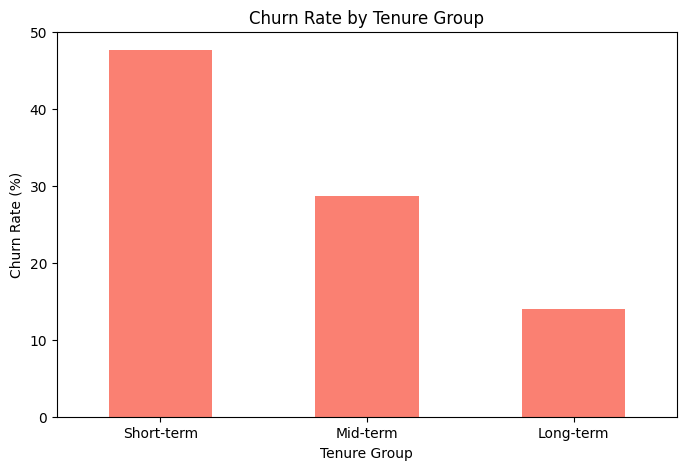

In [228]:
churn_by_tenure = df.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_tenure)

figure(figsize=(8, 5))
churn_by_tenure['Yes'].plot(kind='bar', color='salmon')
title('Churn Rate by Tenure Group')
xlabel('Tenure Group')
xticks(rotation=0)
ylabel('Churn Rate (%)')
show()

---------------------------

In [229]:
df[['tenure', 'Tenure_Group', 'MonthlyCharges', 'Monthly_Charges_Group', 'Contract']]

,tenure,Tenure_Group,MonthlyCharges,Monthly_Charges_Group,Contract
0,1,Short-term,29.85,Low,Month-to-month
1,34,Long-term,56.95,Medium,One year
2,2,Short-term,53.85,Medium,Month-to-month
3,45,Long-term,42.30,Low,One year
4,2,Short-term,70.70,Medium,Month-to-month
...,...,...,...,...,...
7038,24,Mid-term,84.80,Medium,One year
7039,72,Long-term,103.20,High,One year
7040,11,Short-term,29.60,Low,Month-to-month
7041,4,Short-term,74.40,Medium,Month-to-month


- ##### **Customer churn rate based on monthly fees**

Churn                         No        Yes
Monthly_Charges_Group                      
Low                    84.297521  15.702479
Medium                 67.334721  32.665279
High                   71.951220  28.048780


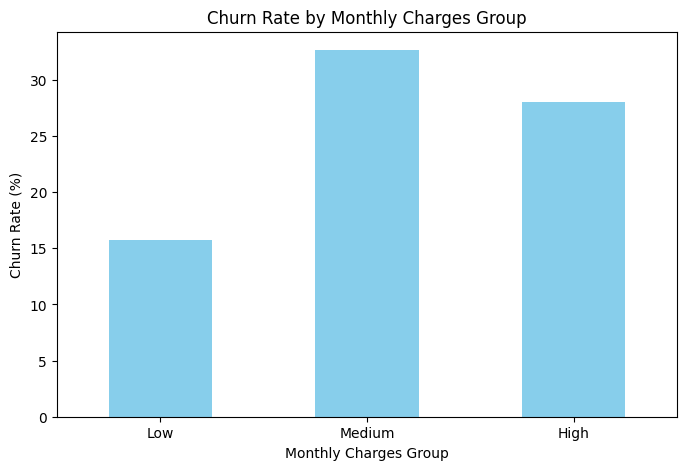

In [230]:
churn_by_charges = df.groupby('Monthly_Charges_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_charges)

figure(figsize=(8, 5))
churn_by_charges['Yes'].plot(kind='bar', color='skyblue')
title('Churn Rate by Monthly Charges Group')
xlabel('Monthly Charges Group')
xticks(rotation=0)
ylabel('Churn Rate (%)')
show()

----------------------------------

- ##### **Customer abandonment rate based on contract type**

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


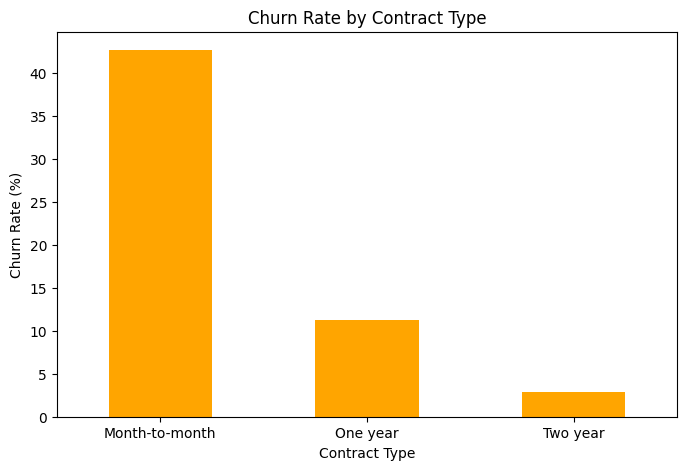

In [231]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_contract)

figure(figsize=(8, 5))
churn_by_contract['Yes'].plot(kind='bar', color='orange')
title('Churn Rate by Contract Type')
xlabel('Contract Type')
xticks(rotation = 0)
ylabel('Churn Rate (%)')
show()

---------------------------------

- ##### **Customer abandonment analysis across multiple groups (tenure + monthly charges)**

In [232]:
churn_by_tenure_charges = df.groupby(['Tenure_Group', 'Monthly_Charges_Group'])['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_tenure_charges)

Churn                                      No        Yes
Tenure_Group Monthly_Charges_Group                      
Short-term   Low                    68.988030  31.011970
             Medium                 40.829876  59.170124
             High                   23.529412  76.470588
Mid-term     Low                    89.518414  10.481586
             Medium                 63.458401  36.541599
             High                   43.103448  56.896552
Long-term    Low                    96.180215   3.819785
             Medium                 84.249629  15.750371
             High                   77.175284  22.824716


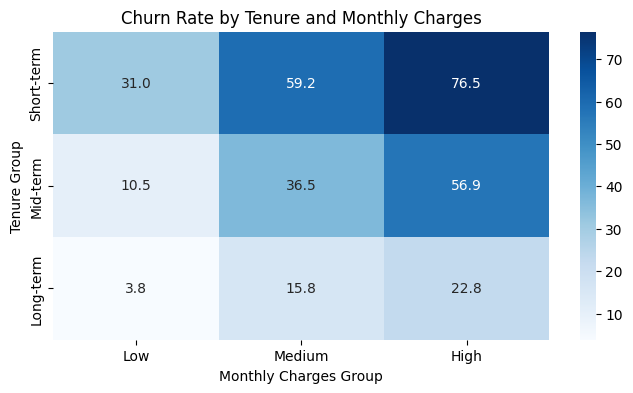

In [233]:
figure(figsize=(8, 4))
heatmap(churn_by_tenure_charges['Yes'].unstack(), annot=True, cmap='Blues', fmt='.1f')
title('Churn Rate by Tenure and Monthly Charges')
xlabel('Monthly Charges Group')
ylabel('Tenure Group')
show()

#### **Impact of Tenure:**

- ##### **Short-term** customers have the highest churn rates across all monthly charge groups. For "Short-term" customers, churn rates range from 31.0% (Low Monthly Charges) to 76.5% (High Monthly Charges). This is a strong indicator that new customers, regardless of their spending, are at high risk of churning.
- ##### **Mid-term** customers have moderate churn rates. These rates are significantly lower than short-term customers but still higher than long-term customers. They range from 10.5% (Low Monthly Charges) to 56.9% (High Monthly Charges).
- ##### **Long-term** customers have the lowest churn rates. Their churn rates are considerably lower, ranging from a very low 3.8% (Low Monthly Charges) to 22.8% (High Monthly Charges). This strongly confirms that customer loyalty increases significantly with tenure.

#### **Impact of Monthly Charges:**

- ##### Higher monthly charges tend to correspond to higher churn rates within each tenure group. For instance, a "Short-term" customer with "High" monthly charges has a 76.5% churn rate, much higher than a "Short-term" customer with "Low" monthly charges (31.0%).
- ##### This trend holds true for "Mid-term" (10.5% vs 56.9%) and "Long-term" (3.8% vs 22.8%) customers as well. This is an interesting finding, as sometimes high-value customers are assumed to be more loyal. Here, within each tenure bucket, higher spenders are more likely to churn. This could indicate dissatisfaction with the value received for higher costs, or perhaps they are premium customers who are more actively targeted by competitors.

#### **Combined Impact (Most and Least Vulnerable Segments):**

- ##### **Highest Churn:** The segment with the highest churn rate is "Short-term" customers with "High" monthly charges (76.5%). This group represents a critical area for immediate attention and targeted retention efforts.
- ##### **Lowest Churn:** The segment with the lowest churn rate is "Long-term" customers with "Low" monthly charges (3.8%). These are your most stable and loyal customers.

--------------------------
--------------------------
--------------------------

## **Transform Data**

----------------------

In [234]:
df = df.drop('Tenure_Group',axis=1)

--------------------------

In [235]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [236]:
# Contract is a ordinal column
df['Contract'] = df['Contract'].replace('Month-to-month', 0)
df['Contract'] = df['Contract'].replace('One year', 1)
df['Contract'] = df['Contract'].replace('Two year', 2)

-----------------------

In [237]:
df['Monthly_Charges_Group'].value_counts()

Monthly_Charges_Group
Medium    3842
Low       2299
High       902
Name: count, dtype: int64

In [238]:
# Monthly_Charges_Group is a ordinal column
df['Monthly_Charges_Group'] = df['Monthly_Charges_Group'].replace('Low', 0)
df['Monthly_Charges_Group'] = df['Monthly_Charges_Group'].replace('Medium', 1)
df['Monthly_Charges_Group'] = df['Monthly_Charges_Group'].replace('High', 2)

In [239]:
df['Monthly_Charges_Group'] = df['Monthly_Charges_Group'].astype(int)

------------------------------

In [240]:
object_data=df.select_dtypes(include='object')
non_object_data = df.select_dtypes(exclude='object')

In [241]:
non_object_data.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Monthly_Charges_Group
0,0,1,0,29.85,29.85,0
1,0,34,1,56.95,1889.50,1
2,0,2,0,53.85,108.15,1
3,0,45,1,42.30,1840.75,0
4,0,2,0,70.70,151.65,1


In [242]:
object_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,Yes


In [243]:
for i in object_data.columns:
    print(f'{i} : {object_data[i].nunique()}')

gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


In [244]:
label = LabelEncoder()

for i in range(0, object_data.shape[1]):
    object_data.iloc[:,i] = label.fit_transform(object_data.iloc[:,i])
    
object_data = object_data.astype(int)

In [245]:
# # saving scaling 
# with open('label.pkl' , 'wb') as f :
#     dump(label, f)

In [246]:
object_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2,1


In [247]:
object_data.PaymentMethod.value_counts()

PaymentMethod
2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64

In [248]:
object_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   Partner           7043 non-null   int32
 2   Dependents        7043 non-null   int32
 3   PhoneService      7043 non-null   int32
 4   MultipleLines     7043 non-null   int32
 5   InternetService   7043 non-null   int32
 6   OnlineSecurity    7043 non-null   int32
 7   OnlineBackup      7043 non-null   int32
 8   DeviceProtection  7043 non-null   int32
 9   TechSupport       7043 non-null   int32
 10  StreamingTV       7043 non-null   int32
 11  StreamingMovies   7043 non-null   int32
 12  PaperlessBilling  7043 non-null   int32
 13  PaymentMethod     7043 non-null   int32
 14  Churn             7043 non-null   int32
dtypes: int32(15)
memory usage: 412.8 KB


In [249]:
df = concat([non_object_data, object_data], axis=1)
df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Monthly_Charges_Group,gender,Partner,Dependents,PhoneService,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,29.85,29.85,0,0,1,0,0,...,0,0,2,0,0,0,0,1,2,0
1,0,34,1,56.95,1889.50,1,1,0,0,1,...,0,2,0,2,0,0,0,0,3,0
2,0,2,0,53.85,108.15,1,1,0,0,1,...,0,2,2,0,0,0,0,1,3,1
3,0,45,1,42.30,1840.75,0,1,0,0,0,...,0,2,0,2,2,0,0,0,0,0
4,0,2,0,70.70,151.65,1,0,0,0,1,...,1,0,0,0,0,0,0,1,2,1


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          7043 non-null   int64  
 1   tenure                 7043 non-null   int64  
 2   Contract               7043 non-null   int64  
 3   MonthlyCharges         7043 non-null   float64
 4   TotalCharges           7043 non-null   float64
 5   Monthly_Charges_Group  7043 non-null   int32  
 6   gender                 7043 non-null   int32  
 7   Partner                7043 non-null   int32  
 8   Dependents             7043 non-null   int32  
 9   PhoneService           7043 non-null   int32  
 10  MultipleLines          7043 non-null   int32  
 11  InternetService        7043 non-null   int32  
 12  OnlineSecurity         7043 non-null   int32  
 13  OnlineBackup           7043 non-null   int32  
 14  DeviceProtection       7043 non-null   int32  
 15  Tech

-------------------------------
------------------------------
-------------------------------

## **Model**

----------------------------------

### **Spliting Data to train and test**

--------------------------

In [251]:
x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7 , random_state=1234)

In [252]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (4930, 20)   ,   x_test : (2113, 20)
y_train : (4930,)   ,   y_test : (2113,)


-------------------------------------------

### **Feature Scaling**
-------------------------------

In [253]:
non_object_data

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Monthly_Charges_Group
0,0,1,0,29.85,29.85,0
1,0,34,1,56.95,1889.50,1
2,0,2,0,53.85,108.15,1
3,0,45,1,42.30,1840.75,0
4,0,2,0,70.70,151.65,1
...,...,...,...,...,...,...
7038,0,24,1,84.80,1990.50,1
7039,0,72,1,103.20,7362.90,2
7040,0,11,0,29.60,346.45,0
7041,1,4,0,74.40,306.60,1


In [254]:
scaler = StandardScaler()

x_train[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(x_train[['MonthlyCharges','TotalCharges','tenure']])
x_test[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(x_test[['MonthlyCharges','TotalCharges','tenure']])

In [255]:
x_train

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Monthly_Charges_Group,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
3101,0,1.045265,0,0.495399,0.991004,1,0,0,0,1,2,1,2,0,0,0,0,0,1,0
5142,0,1.372512,1,1.318189,1.988279,2,0,0,0,1,2,1,2,2,2,2,2,0,1,0
5937,1,-1.000028,0,0.635024,-0.741872,1,0,1,0,1,2,1,0,0,0,0,0,2,1,2
4110,0,1.536136,2,0.101457,1.051800,1,1,1,0,1,0,0,2,2,0,2,0,2,0,3
3574,0,-1.286369,0,-1.480961,-1.004475,0,0,0,0,1,0,2,1,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0,1.004359,2,-1.509218,-0.496473,0,0,1,1,1,0,2,1,1,1,1,1,1,0,0
3276,0,-1.163652,0,0.473790,-0.873008,1,0,0,0,1,0,1,0,0,0,0,0,2,1,2
1318,0,-1.000028,0,0.059902,-0.757105,1,1,0,0,1,0,0,2,0,2,0,0,2,1,2
723,0,-1.204558,0,-0.649859,-0.950830,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2


----------------------------------------

## **Creating Model with ML algorithms for Binary-classification** 

-----------------------------

In [256]:
models = [
    LogisticRegression(),
    XGBClassifier(),
    GaussianNB(),
    SVC()
]

In [257]:
def BClass(model):
    print(f"🔹 Model: {model}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('confusion matrix:\n' , confusion_matrix(y_test, y_pred))

------------------------

In [258]:
BClass(models[0])

🔹 Model: LogisticRegression()
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1563
           1       0.63      0.55      0.59       550

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

confusion matrix:
 [[1385  178]
 [ 248  302]]


- ##### The model achieves a respectable 80% overall accuracy.
- ##### It performs much better at identifying class 0 (high precision, recall, and F1-score for class 0).
- ##### However, its performance for class 1 is notably weaker (precision of 0.63, recall of 0.55, F1-score of 0.59). The lower recall for class 1 (0.55) indicates that it misses a significant portion of actual class 1 instances (248 False Negatives out of 550 total class 1 instances).
- ##### Given the class imbalance (1563 for class 0 vs 550 for class 1), it's important to look beyond just accuracy. The lower F1-score for class 1 highlights that the model struggles more with this minority class. This could be a concern if accurately identifying class 1 is the primary goal (e.g., predicting rare events, identifying churned customers).
- ##### The confusion matrix visually confirms these points, showing a good number of correct predictions for class 0 but more errors (both FP and FN) for class 1.

--------------------------------

In [259]:
BClass(models[1])

🔹 Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1563
           1       0.59      0.51      0.55       550

    accuracy                           0.7

- #### The XGBoost model has an overall accuracy of 78%.
- #### Similar to the Logistic Regression model (if compared to the previous image), it performs well on the majority class (Class 0), correctly classifying a high percentage of those instances (high precision and recall for class 0).
- #### However, its performance on the minority class (Class 1) is less robust.
- ##### Its recall for class 1 is 0.51, meaning it only identifies about half of the actual class 1 instances. There are 269 False Negatives, indicating a significant number of class 1 instances were missed.
- ##### The precision for class 1 is 0.59, meaning that when it predicts class 1, it's only correct about 59% of the time.
- #### Given the class imbalance, the lower F1-score for class 1 (0.55) is particularly telling, showing that the model struggles to balance precision and recall for the minority class.
-----------------------------------

In [260]:
BClass(models[2])

🔹 Model: GaussianNB()
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1563
           1       0.52      0.74      0.61       550

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.75      0.77      2113

confusion matrix:
 [[1186  377]
 [ 144  406]]


- ##### The Gaussian Naive Bayes model has an overall accuracy of 75%.
- ##### It excels in precision for class 0 (0.89), meaning when it predicts class 0, it's almost always right.
- ##### However, it sacrifices precision for class 1 to achieve a relatively high recall for class 1 (0.74). This means it's good at identifying most of the actual class 1 instances, but a significant portion of its "class 1" predictions are incorrect (False Positives = 377).
- ##### Compared to the Logistic Regression and XGBoost models shown previously, this GaussianNB model appears to prioritize recall for the minority class (Class 1) more heavily (0.74 vs 0.55/0.51 respectively for LR/XGB). This comes at the cost of lower precision for class 1 and a slightly lower overall accuracy.
------------------------------

In [261]:
BClass(models[3])

🔹 Model: SVC()
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1563
           1       0.67      0.47      0.55       550

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113

confusion matrix:
 [[1438  125]
 [ 294  256]]


- ##### The SVC model achieves a solid 80% overall accuracy.
- ##### It demonstrates excellent performance for the majority class (Class 0), with very high recall (0.92) and good precision (0.83). This means it's very good at correctly identifying non-events and has few false positives for this class.
- ##### However, its performance for the minority class (Class 1) is mixed. While it has decent precision (0.67), meaning when it does predict Class 1, it's often correct, its recall is quite low (0.47). This signifies that the model misses almost half of the actual Class 1 instances (294 False Negatives).
-----------------------------------------------
----------------------------------------------

## **Using Class Weights in Model**

In [262]:
print("--- Logistic Regression with class_weight='balanced' ---")
lr_model_weighted = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear', max_iter=1000) 

lr_model_weighted.fit(x_train, y_train)

y_pred_lr_weighted = lr_model_weighted.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr_weighted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_weighted))

--- Logistic Regression with class_weight='balanced' ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1563
           1       0.49      0.79      0.61       550

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.75      2113

Confusion Matrix:
[[1117  446]
 [ 116  434]]


- ##### **Overall Accuracy:** The overall accuracy of 73% is slightly lower than some unweighted models (e.g., the 80% seen in the first Logistic Regression plot). This is a common trade-off when using class weights; accuracy might drop slightly, but performance on the minority class improves.
- ##### **Key Improvement:** Minority Class Recall: The most notable change is the significant increase in recall for Class 1 (0.79). This means the model is now much better at identifying actual instances of the minority class, missing fewer of them (lowering False Negatives from 248/294 in previous models down to 116).
- ##### **Trade-off:** Minority Class Precision: This improvement in recall for Class 1 comes at the cost of a lower precision for Class 1 (0.49). The model is now predicting more instances as Class 1, but a higher proportion of these predictions are incorrect (more False Positives, 446 compared to 178/197 in previous models).
- ##### **Use Case:** This model would be preferred if the cost of False Negatives (missing an actual Class 1 instance) is higher than the cost of False Positives (incorrectly predicting Class 1). For example, in a churn prediction scenario, if identifying as many actual churners as possible is paramount (even if some non-churners are falsely flagged), this model with balanced class weights would be a strong candidate.

---------------------------------

In [263]:
print("--- SVC with class_weight='balanced' ---")
svc_model_weighted = SVC(class_weight='balanced', random_state=42)

svc_model_weighted.fit(x_train, y_train)

y_pred_svc_weighted = svc_model_weighted.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_svc_weighted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_weighted))

--- SVC with class_weight='balanced' ---


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1563
           1       0.50      0.76      0.60       550

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.74      0.75      2113

Confusion Matrix:
[[1136  427]
 [ 130  420]]


- ##### **Overall Accuracy:** The overall accuracy of 74% is slightly lower than the unweighted SVC (80%) but is a common trade-off when optimizing for imbalanced classes.
- ##### **Key Improvement:** Minority Class Recall: The most significant gain is in the recall for Class 1 (0.76). This means the model is now much more effective at identifying actual instances of the minority class, drastically reducing the number of missed positives (False Negatives of 130).
- ##### **Trade-off:** Minority Class Precision: This improved recall for Class 1 comes at the cost of a lower precision for Class 1 (0.50). The model is now more aggressive in predicting Class 1, leading to a higher number of False Positives (427).
- ##### **Use Case:** This model would be highly desirable in scenarios where identifying every possible instance of the minority class (minimizing False Negatives) is more critical than having perfect precision in those predictions. For example, in disease detection, fraud detection, or, in your dataset's context, identifying customer churn: if the cost of missing a churner is high (e.g., lost revenue), but the cost of a false alarm (incorrectly identifying a non-churner as a churner, which leads to a retention effort for a loyal customer) is relatively lower, this model would be a strong choice.

-------------------------------------------------
-------------------------------

## **Using Over-Sampling**

In [265]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)


lr_model_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
lr_model_smote.fit(X_train_resampled, y_train_resampled)

y_pred_lr_smote = lr_model_smote.predict(x_test)

print(classification_report(y_test, y_pred_lr_smote))
print(confusion_matrix(y_test, y_pred_lr_smote))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1563
           1       0.50      0.77      0.60       550

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.74      0.75      2113

[[1131  432]
 [ 126  424]]


- ##### This model achieves an overall accuracy of 74%. Its most notable characteristic is its successful improvement in recall for the minority Class 1 (0.77). This means it is highly effective at identifying actual instances of Class 1, which is often a primary goal in imbalanced datasets (e.g., detecting churn, fraud, or diseases).

- ##### However, this gain in recall comes with a trade-off in precision for Class 1 (0.50). The model now generates a higher number of False Positives (432), meaning it frequently predicts Class 1 when the actual class is 0.

- ##### Use Case : This model would be suitable for scenarios where the cost of False Negatives (missing an actual Class 1 instance) is higher than the cost of False Positives (incorrectly flagging a Class 0 instance as Class 1). For example, if Class 1 represents customer churn, a company might prefer to identify more potential churners (even if some are false alarms) to allow for proactive retention efforts, rather than missing actual churners.

-------------------------------------

In [267]:
lr_model_smote = SVC(random_state=42)
lr_model_smote.fit(X_train_resampled, y_train_resampled)

y_pred_lr_smote = lr_model_smote.predict(x_test)

print(classification_report(y_test, y_pred_lr_smote))
print(confusion_matrix(y_test, y_pred_lr_smote))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1563
           1       0.51      0.74      0.61       550

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113

[[1174  389]
 [ 141  409]]


- ##### This model achieves an overall accuracy of 75%. Its most prominent feature is the significant improvement in recall for the minority Class 1 to 0.74. This means the model is much more efficient at identifying actual instances of the minority class, greatly reducing the number of missed positive cases (False Negatives).

- ##### However, this improvement in recall for Class 1 comes at the cost of lower precision for Class 1 (0.51). The model now shows a greater tendency to incorrectly predict Class 1 (an increase in False Positives).

- ##### Use Case : This model would be suitable for scenarios where the cost of False Negatives (i.e., missing an actual Class 1 instance) is higher than the cost of False Positives (i.e., incorrectly predicting Class 1 for a case that isn't). For example, in applications like early disease detection or fraud detection, where identifying every potential positive case is critical, even if it leads to some false alarms, this model would be a strong choice.

----------------------------------------------
----------------------------------

# <center><strong>Conclusion</strong></center>
--------------------------------------------------

##### **In binary classification, particularly with imbalanced datasets where one class significantly outnumbers the other, achieving robust model performance necessitates a focus beyond simple accuracy. Our analysis demonstrated that while initial models might favor the majority class, techniques like applying class_weight='balanced' or using SMOTE effectively improve the recall for the minority class, ensuring more positive instances are correctly identified. This often comes with a trade-off in precision and overall accuracy, highlighting that the most optimal model is not merely the most "accurate," but rather the one whose performance metrics—especially the balance between precision and recall—best align with the specific costs and objectives of the underlying business problem, such as minimizing missed opportunities in churn prediction or fraud detection.**
--------------------------------------

In [6]:
!jupyter nbconvert --to html "Telec_Customer_Churn_BClassification.ipynb"

[NbConvertApp] Converting notebook Telec_Customer_Churn_BClassification.ipynb to html
C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 1548250 bytes to Telec_Customer_Churn_BClassification.html
